# Prerequsite Test
### Nokzendi Aier 20110173

NOTE: All values of time are in seconds

#### 1.
Given two matrices of sizes $(n, k)$ and $(k, m)$
<br>
<br>
The number of multiplications required to multiply can be broken down like so:
<br>
The first row of the first matrix will be multiplied with the first column of the second matrix. The first element of the row gets multiplied to the first element of the column and so on. This means that there are $k$ total multiplications happening in this step.\
We know that this step will happen for all the $n$ rows from the first matrix to all the $m$ columns of the second matrix i.e., a total of $nm$ times. Therefore, we can say that the total number of multiplications will be $nkm$.
<br>
<br>
The number of additions required to multiply can be broken down like so:
<br>
We will look at each element of the final matrix, which will be of the size $n*m$. Each element was created by the result of adding all the sub-products formed during the $k$ multiplications we did. Therefore, for each element there are $k-1$ additions we perform. Since there are $nm$ total elements, we can say that the total number of additions will be $n(k-1)m$.

#### 2. 
The python code to multiply the above two matrices are as follows:
<br>
The first one is using list of list in python.
<br>
The second one is using numpy.

In [ ]:
# Using list of lists

import random
import timeit
import statistics as st
SIZE = 1000


def matrix_multiplication():

    for i in range(n):
        temp = []
        for j in range(k):
            temp.append(random.randint(-2147483648, 2147483647))
        A.append(temp)

    for i in range(k):
        temp = []
        for j in range(m):
            temp.append(random.randint(-2147483648, 2147483647))
        B.append(temp)

    start = timeit.default_timer()

    for i in range(n):
        temp = []
        for j in range(m):
            value = 0
            for l in range(k):
                value += A[i][l] * B[l][j]
            temp.append(value)
        C.append(temp)

    stop = timeit.default_timer()
    
    return stop - start


def get_avg():
    total = 0
    for i in range(SIZE):
        total += timetaken[i]
    
    return total/SIZE
    

n = 64
k = 32
m = 64

A = []
B = []
C = []
timetaken = []

for i in range(SIZE):
    time = matrix_multiplication()
    timetaken.append(time)

avg = get_avg()
print("The average time taken: ", avg)
print("Standard deviation: ", st.stdev(timetaken))


The average time taken:  0.025557895299999973
Standard deviation:  0.003272186051599742


In [ ]:
# Using numpy

import random
import timeit
import numpy as np
import statistics as st
SIZE = 1000


def matrix_multiplication():
    for i in range(n):
        temp = []
        for j in range(k):
            A[i][j] = random.randint(-2147483648, 2147483647)
    
    for i in range(k):
        temp = []
        for j in range(m):
            B[i][j] = random.randint(-2147483648, 2147483647)

    start = timeit.default_timer()

    C = np.dot(A, B)

    stop = timeit.default_timer()
    
    return stop - start


def get_avg():
    total = 0
    for i in range(SIZE):
        total += timetaken[i]
    
    return total/SIZE


n = 64
k = 32
m = 64

A = np.zeros(shape = (n, k))
B = np.zeros(shape = (k, m))
timetaken = []

for i in range(SIZE):
    time = matrix_multiplication()
    timetaken.append(time)

avg = get_avg()
print("The average time taken: ", avg)
print("Standard deviation: ", st.stdev(timetaken))


The average time taken:  0.00015780410000000344
Standard deviation:  0.0017951285484607163


After running the above two code multiple times, we can see that numpy out-performs the conventional "for loops" version(as per the constraints used in the code). This efficiency is more pronounced with larger and larger values of the dimensions of the matrices. 
<br>

This is because np.dot executes the arithmetic operations and the enclosing loop in compiled code. This performs better than the Python interpretor.

#### 3.
According to the method given in the question, we make one traversal of the array to find the highest element. Finding the second element required 2 passes and so on. Therefore, to find the median: 
<br>
* If n is odd, median is the $ (\frac{n}{2} + 1)^{th} $ element. Therefore, it requires $ \frac{n}{2} + 1$ passes.
<br>
* If n is even, median is the average of the middle two elements, which are the $ (\frac{n}{2})^{th} $ and $ (\frac{n}{2} + 1)^{th} $ element. Therefore, it requires $ \frac{n}{2} + 1$ passes.
<br>

Since each pass will take $ O(n) $ time, we have a total complexity of $ O(\frac{n}{2} + 1)*O(n) = O(n^2)$
<br>

A better method would be to sort the array first and find the median by looking up the middle element. If the sorting is done in $ O(n\log{n}) $ time, then we only have to look up the middle element which takes $ O(1) $ time. Therefore, the overall time complexity will be $ O(n\log{n}) $.
<br>

Both of these functions are implemented below in order. We then compare it against the *numpy.median* routine in terms of time.


In [31]:
# Using multiple iterations to get to the median. O(n^2)

import timeit
import random
import statistics as st

ITR = 1000
SIZE = 2000


def find_median():
    check = [0]*SIZE
    
    start = timeit.default_timer()
    
    for i in range(SIZE//2 + 1):
        index = 0
        previndex = 0
        maxval = -2147483648
        for j in range(SIZE):
            if(check[j] == 0 and list[j] > maxval):
                maxval = list[j]
                previndex = index
                index = j  
        check[index] = 1

    if(SIZE%2 == 0):
        median = (list[index] + list[previndex]) / 2
    else:
        median = list[index]
    
    stop = timeit.default_timer()
    
    return stop - start
                
    
def get_avg():
    total = 0
    for i in range(ITR):
        total += timetaken[i]
    
    return total/ITR

list = [0]*SIZE
timetaken = []

for i in range(ITR):
    for j in range(SIZE):
        list[j] = random.randint(-2147483648, 2147483647)
    time = find_median()
    timetaken.append(time)

avg = get_avg()
print("The average time taken: ", avg)
print("Standard deviation: ", st.stdev(timetaken))

The average time taken:  0.24545749888400586
Standard deviation:  0.025590445358078296


In [32]:
# Using the sorting method. O(nlogn)

import timeit
import random
import statistics as st

ITR = 1000
SIZE = 2000

def find_median():
    start = timeit.default_timer()
    
    list.sort()
    if(SIZE%2 == 0):
        median = (list[SIZE//2] + list[SIZE//2 + 1]) / 2
    else:
        median = list[SIZE//2 + 1]
    
    stop = timeit.default_timer()
    
    return stop - start


def get_avg():
    total = 0
    for i in range(ITR):
        total += timetaken[i]
    
    return total/ITR

list = [0]*SIZE
timetaken = []

for i in range(ITR):
    for j in range(SIZE):
        list[j] = random.randint(-2147483648, 2147483647)
    time = find_median()
    timetaken.append(time)
    
avg = get_avg()
print("The average time taken: ", avg)
print("Standard deviation: ", st.stdev(timetaken))


The average time taken:  0.0004149884170083169
Standard deviation:  5.751998331168139e-05


In [33]:
# Using numpy.median

import timeit
import random
import numpy as np
import statistics as st

ITR = 1000
SIZE = 2000

def find_median():
    start = timeit.default_timer()
    
    median = np.median(list)
    
    stop = timeit.default_timer()
    
    return stop - start


def get_avg():
    total = 0
    for i in range(ITR):
        total += timetaken[i]
    
    return total/ITR

list = [0]*SIZE
timetaken = []

for i in range(ITR):
    for j in range(SIZE):
        list[j] = random.randint(-2147483648, 2147483647)
    time = find_median()
    timetaken.append(time)
    
avg = get_avg()
print("The average time taken: ", avg)
print("Standard deviation: ", st.stdev(timetaken))

The average time taken:  0.0003191218379961356
Standard deviation:  0.00011848172141898643


We can see from the results above that the first method is significantly slower than the sorting and the numpy solution. The times for the sorting and the numpy solution are similar. This may be because both underlying methods are the same. However, we do observe that the numpy version is slighty faster. This may be amplified if we take larger values of SIZE.

#### 4.
To find the gradient of the function $ f = x^2y + y^3\sin{x} $ with respect to $x$ and $y$.
<br>

$ \frac{df}{dx} = 2xy + y^3\cos{x} $
<br>

$ \frac{df}{dy} = x^2 + 3y^2\sin{x} $
<br>

Therefore, the gradient of $f$ is ($ 2xy + y^3\cos{x} $, $ x^2 + 3y^2\sin{x} $)

#### 5.

In [36]:
import jax.numpy as np
from jax import grad
import random


def f(x, y):
  return x**2 * y + y**3 * np.sin(x)


gradient = grad(f, argnums=(0, 1))


A = np.zeros(3, dtype = float)
B = np.zeros(3, dtype = float)

for i in range (3):
  # A[i] = random.uniform(0, 10000)
  # B[i] = random.uniform(0, 10000) // This type of assignment does not work because it's immutable
  A = A.at[i].set(random.uniform(0, 10000))
  B = B.at[i].set(random.uniform(0, 10000))


for i in range (3):
  analytical_gradient = [2*A[i]*B[i] + (B[i]**3)*np.cos(A[i]), A[i]**2 + 3*B[i]**2*np.sin(A[i])]
  numerical_gradient = gradient(A[i], B[i])
  print(f"\nGradients for x = {A[i]} and y = {B[i]}")
  print("(", analytical_gradient[0], ",", analytical_gradient[1], ")")
  print("(", numerical_gradient[0], ",", numerical_gradient[1], ")")



Gradients for x = 5333.36962890625 and y = 5821.4228515625
( 97419060000.0 , -59980016.0 )
( 97419060000.0 , -59980016.0 )

Gradients for x = 7265.5498046875 and y = 6533.98388671875
( -161258850000.0 , 157266910.0 )
( -161258850000.0 , 157266910.0 )

Gradients for x = 2565.053466796875 and y = 2396.481201171875
( 795481540.0 , 23780948.0 )
( 795481540.0 , 23780948.0 )


#### 6.

In [34]:
import sympy

x, y = sympy.symbols('x y')

f = x**2 * y + y**3 * sympy.sin(x)

dx = sympy.diff(f, x)
dy = sympy.diff(f, y)

print(f"Gradient with respect to x: {dx}")
print(f"Gradient with respect to y: {dy}")


Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


#### 7.

In [11]:
myDict = {2022: {"Branch 1": {1: {"Roll number": 1, "Name": "N", "Marks": {"Maths": 100, "English": 70}}},
                 "Branch 2": {1: {"Roll number": 12, "Name": "M", "Marks": {"Maths": 100, "English": 40}},
                              2: {"Roll number": 30, "Name": "O", "Marks": {"Maths": 90, "English": 80}}}},
          2023: {"Branch 1": {1: {}},
                 "Branch 2": {1: {}}},
          2024: {"Branch 1": {1: {}},
                 "Branch 2": {1: {}}},
          2025: {"Branch 1": {1: {}},
                 "Branch 2": {1: {}}}
          }
        
print(myDict)

{2022: {'Branch 1': {1: {'Roll number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {1: {'Roll number': 12, 'Name': 'M', 'Marks': {'Maths': 100, 'English': 40}}, 2: {'Roll number': 30, 'Name': 'O', 'Marks': {'Maths': 90, 'English': 80}}}}, 2023: {'Branch 1': {1: {}}, 'Branch 2': {1: {}}}, 2024: {'Branch 1': {1: {}}, 'Branch 2': {1: {}}}, 2025: {'Branch 1': {1: {}}, 'Branch 2': {1: {}}}}


#### 8.

In [27]:
class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

class Branch:
    def __init__(self, name, students):
        self.branch_name = name
        self.students = students

class Student:
    def __init__(self, roll, name, marks):
        self.rollnum = roll
        self.name = name
        self.marks = marks

Database = [
    Year(2022, [
        Branch('Branch 1', [Student(1, 'Nokzendi', {'Maths': 100, 'English': 70})]),
        Branch('Branch 2', [Student(12, 'M', {'Maths': 100, 'English': 40}), Student(30, 'O', {'Maths': 90, 'English': 80})])
    ]),

    Year(2023, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
    
    Year(2024, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
    Year(2025, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
]

print("The first value of our database is: ")
print("Year:", Database[0].year)
print("Branch:", Database[0].branches[0].branch_name)
print("Student roll number:", Database[0].branches[0].students[0].rollnum)
print("Student name:", Database[0].branches[0].students[0].name)
print("Student marks:", Database[0].branches[0].students[0].marks)


The first value of our database is: 
Year: 2022
Branch: Branch 1
Student roll number: 1
Student name: Nokzendi
Student marks: {'Maths': 100, 'English': 70}


#### 9.
The code are as follows:

Text(0.5, 1.0, 'y = x')

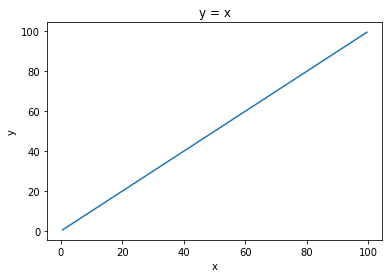

In [ ]:
# y = x

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x

x = np.arange(0.5, 100.0, 0.5)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x')


Text(0.5, 1.0, 'y = x^2')

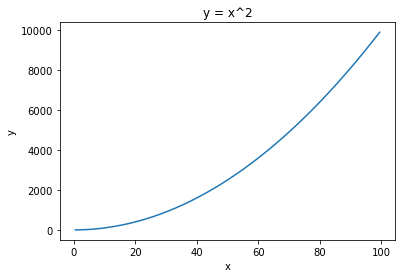

In [ ]:
# y = x^2

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

x = np.arange(0.5, 100.0, 0.5)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')


Text(0.5, 1.0, 'y = x^3 / 100')

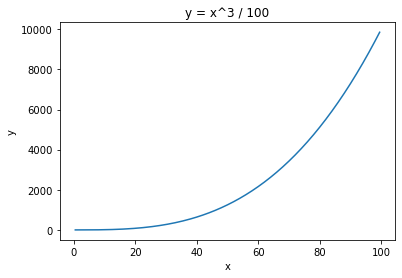

In [ ]:
# y = x^3 / 100

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**3 / 100

x = np.arange(0.5, 100.0, 0.5)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^3 / 100')


Text(0.5, 1.0, 'y = sin(x)')

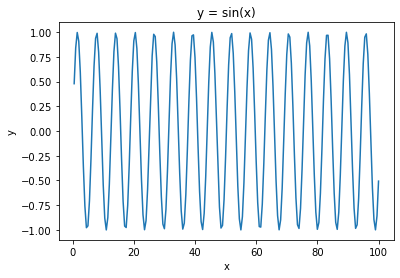

In [ ]:
# y = sin(x)

import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0.5, 100.0, 200)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')


Text(0.5, 1.0, 'y = sin(x) / x')

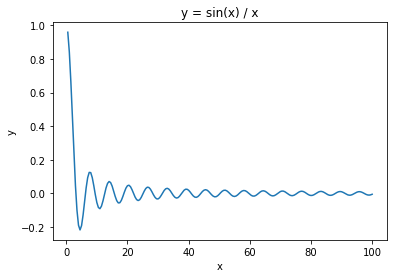

In [ ]:
# y = sin(x) / x

import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0.5, 100.0, 200)
y = np.sin(x)/x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x) / x')

Text(0.5, 1.0, 'y = log(x)')

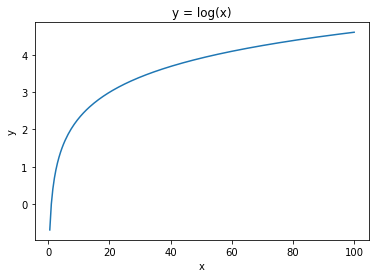

In [ ]:
# y = log(x)

import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0.5, 100.0, 200)
y = np.log(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = log(x)')

Text(0.5, 1.0, 'y = exp(x)')

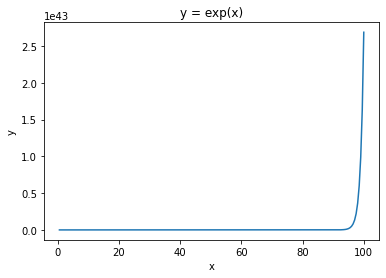

In [ ]:
# y = exp(x)

import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0.5, 100.0, 200)
y = np.exp(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = exp(x)')

#### 10. 

In [39]:
import numpy as np
import pandas as pd

# Generating a 20x5 matrix of random numbers
matrix = np.random.uniform(1, 2, size=(20, 5))

# Creating a dataframe from the matrix
dataframe = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Finding the column with the highest standard deviation
col = dataframe.std().idxmax()

# Finding the row with the lowest mean
row = dataframe.mean(axis=1).idxmin()

print("The dataframe is:")
print(dataframe)
print("\nColumn with the highest standard deviation:", col)
print("\nRow with the lowest mean:", row)


The dataframe is:
           a         b         c         d         e
0   1.143696  1.979212  1.537172  1.571889  1.373894
1   1.407062  1.815223  1.848596  1.938076  1.302681
2   1.830190  1.933691  1.124523  1.562906  1.384061
3   1.764158  1.027217  1.013480  1.406140  1.022186
4   1.902734  1.226944  1.482754  1.986118  1.578234
5   1.629456  1.624720  1.953825  1.801493  1.721898
6   1.119602  1.749639  1.221053  1.690607  1.986111
7   1.118214  1.798860  1.880318  1.645467  1.148285
8   1.994253  1.656100  1.037811  1.321637  1.952759
9   1.312621  1.874861  1.547396  1.616193  1.225654
10  1.761924  1.121608  1.736918  1.323850  1.643350
11  1.005292  1.319932  1.219974  1.146360  1.638120
12  1.607550  1.873736  1.649683  1.266856  1.960378
13  1.869900  1.547055  1.491406  1.894942  1.292767
14  1.658224  1.036300  1.716869  1.916050  1.588607
15  1.242325  1.942252  1.719676  1.135251  1.765740
16  1.960551  1.921701  1.427714  1.016543  1.432871
17  1.049610  1.474011  1.85

#### 11.

In [38]:
import numpy as np
import pandas as pd

# Generating a matrix of random numbers
matrix = np.random.uniform(1, 2, size=(20, 5))

# Creating a dataframe from the matrix
dataframe = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

print("The dataframe is:")
print(dataframe)

# Adding a new column 'f' as the sum of the existing columns 'a', 'b', 'c', 'd', 'e'
dataframe['f'] = dataframe['a'] + dataframe['b'] + dataframe['c'] + dataframe['d'] + dataframe['e']

# Creating a new column 'g' with values 'LT8' or 'GT8' depending on the value in column 'f'
dataframe = dataframe.assign(g=np.where(df['f'] < 8, 'LT8', 'GT8'))

print("\nThe new dataframe is:")
print(dataframe)

# Finding the number of rows in the dataframe where the value in 'g' is 'LT8'
lt8_count = dataframe.loc[dataframe['g'] == 'LT8', 'g'].count()
print('\nNumber of rows where the value in the column "g" is "LT8": ', lt8_count)

# Finding the standard deviation of column 'f' for the rows where the value in the column 'g' is 'LT8'
lt8_std = dataframe.loc[dataframe['g'] == 'LT8', 'f'].std() 
print('\nStandard deviation of the column "f" for rows where the value in the column "g" is "LT8": ', lt8_std)

# Finding the standard deviation of column 'f' for the rows where the value in the column 'g' is 'GT8'
gt8_std = dataframe.loc[dataframe['g'] == 'GT8', 'f'].std()
print('\nStandard deviation of the column "f" for rows where the value in the column "g" is "GT8": ', gt8_std)

The dataframe is:
           a         b         c         d         e
0   1.043739  1.184762  1.012751  1.702051  1.122068
1   1.371427  1.620260  1.129581  1.244759  1.621626
2   1.251910  1.666433  1.238958  1.054436  1.457066
3   1.158498  1.788444  1.473461  1.194132  1.493196
4   1.435244  1.958468  1.778436  1.528608  1.908910
5   1.338584  1.999706  1.171521  1.337466  1.374481
6   1.482438  1.060321  1.343065  1.130668  1.125026
7   1.479368  1.687290  1.042824  1.904725  1.084779
8   1.734064  1.130681  1.066576  1.471276  1.797958
9   1.499369  1.844373  1.988567  1.535713  1.201147
10  1.540177  1.863104  1.943640  1.002627  1.111615
11  1.136782  1.500009  1.117794  1.534879  1.281573
12  1.772615  1.496088  1.702369  1.233923  1.829047
13  1.101101  1.462322  1.205558  1.385867  1.351139
14  1.199406  1.944444  1.574281  1.468543  1.634279
15  1.470561  1.901794  1.103569  1.262993  1.943434
16  1.483024  1.700500  1.219078  1.014292  1.930598
17  1.481641  1.522001  1.06

#### 12.
Broadcasting describes how NumPy treats arrays with different shaped during arithmetic operations. The smaller array is broadcast into the shape of the larger array if it satisfies some constraints. These constraints are given in detail in the NumPy website and documentation. This is done efficienty by NumPy as it does not create copies of the smaller array to fit the size of the larger array, instead it knows to reuse the same smaller array.

In [ ]:
import numpy as np

A = np.array([[9, 8, 7], [6, 5, 4]])
B = np.array([[3, 2, 1]])

res = A + B
print(res)


[[12 10  8]
 [ 9  7  5]]


#### 13.

In [ ]:
import numpy as np
SIZE = 100
INT_MAX = 2147483647

def argmin():
    index = 0
    minval = INT_MAX
    for i in range(SIZE):
        if(A[i] < minval):
            minval = A[i]
            index = i
    return index


A = np.random.randint(INT_MAX, size = SIZE)
ans1 = argmin()
ans2 = np.argmin(A)

print("The argmin from our function is:", ans1)
print("The argmin from np.argmin is:", ans2)


The argmin from our function is: 49
The argmin from np.argmin is: 49


We can see that both the answers are the same